<a href="https://colab.research.google.com/github/jhowsilvaa/Analise_de_dados_do_panorama_do_COVID_19_na_Finlandia/blob/main/Panorama_do_COVID_19_na_Finl%C3%A2ndia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Panorama do COVID-19 na Finl√¢ndia**
-----

A Covid-19 √© uma infec√ß√£o respirat√≥ria aguda causada pelo coronav√≠rus SARS-CoV-2 com potencial grave, altamente transmiss√≠vel e distribui√ß√£o global.


O virus √© transmitido principalmente por meio de got√≠culas provenientes de tosses ou espirros de pessoas infectadas, ocasionando sintomas como tosse, febre, cansa√ßo, dores pelo corpo e dificuldade para respirar.

 Atualmente n√£o existe medicamento espec√≠fico para a covid-19. A principal forma de se proteger e evitar o aumento do n√∫mero de casos e o desenvolvimento de novas variantes da doen√ßa √© a vacina√ß√£o.

Com o objetivo de elevar a consci√™ncia situacional a respeito do COVID-19 na Finl√¢ndia, irei realizar uma an√°lise sobre os dados p√∫blicos da doen√ßa.




<center>
<img alt="Colaboratory logo" width="75%"  src="https://user-images.githubusercontent.com/121787728/211541151-60e6f57e-069e-46c8-a564-c74850eec7ca.png">
</center>

Antes de iniciarmos a analise, √© importante que tenhamos uma no√ß√£o geral sobre a Finl√¢ndia e suas caracter√≠sticas. Vamos fazer uma breve introdu√ß√£o para conhecermos melhor esse pa√≠s situado no norte da Europa, conhecido pela sua natureza exuberante e pela sua incr√≠vel exibi√ß√£o de auroras boreais.

A Finl√¢ndia √© um pa√≠s europeu situado ao norte do continente, com uma popula√ß√£o de mais de 5,5 milh√µes de habitantes. Sua capital, Helsinki, fica no sul do pa√≠s e tem uma rica hist√≥ria cultural e arquitet√¥nica. O territ√≥rio finland√™s √© banhado pelo Mar B√°ltico ao sul e oeste e compartilha fronteiras com a Su√©cia, Noruega e R√∫ssia.

O pa√≠s n√≥rdico √© conhecido por sua natureza selvagem e belas paisagens, mas tamb√©m √© altamente industrializado e tecnologicamente avan√ßado. A maior parte da popula√ß√£o finlandesa vive na parte sul do pa√≠s, especialmente na regi√£o de Uusimaa, devido ao clima rigoroso no norte. A popula√ß√£o finlandesa tem uma expectativa de vida longa e saud√°vel, mas o crescimento populacional √© lento, com uma taxa de crescimento anual de apenas 0,26%.

A economia finlandesa √© baseada em livre mercado e √© altamente diversificada, com setores fortes em tecnologia, comunica√ß√µes e ind√∫stria. Isso se reflete em sua renda per capita, que √© compar√°vel √† de outros pa√≠ses desenvolvidos da Europa, como √Åustria, B√©lgica, Holanda e Su√©cia. A Finl√¢ndia possui uma ampla rede de infraestrutura, incluindo transporte, educa√ß√£o, sa√∫de e servi√ßos p√∫blicos, para atender √†s necessidades da popula√ß√£o tanto nas cidades quanto no campo.

## **Importa√ß√£o de dados** <img align="left" alt="Colaboratory logo" width="3%" src="https://cdn-icons-png.flaticon.com/128/2854/2854088.png">

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image, ImageDraw, ImageFont
from rich.console import Console
from rich import print
from rich.panel import Panel
from rich.layout import Layout
import seaborn as sns
%matplotlib inline


<p align="center"> 
Todos os dados usados aqui foram obtidos a partir do site <a href="https://github.com/owid/covid-19-data/tree/master/public/data">owid</a>
</p>
<p align="center"> 
<img align="center" alt="Colaboratory logo" width="25%" src="https://i.pinimg.com/originals/d7/ae/01/d7ae0170d3d5ffcbaa7f02fdda387a3b.gif">



<p align="center"> 
Para esta an√°lise explorat√≥ria, ser√° baixado apenas o seguinte arquivo:
</p>
<p> 
<li align="center"><b>owid-covid-data.csv</b> - uma cole√ß√£o dos dados COVID-19 inspirados por <a href="https://ourworldindata.org/coronavirus">our World in Data</a>.</p>

Os dados que our world in data disponibiliza s√£o da <a href="https://coronavirus.jhu.edu/map.html">Johns Hopkins University</a> (JHU). 

A JHU √© uma das fontes de dados mais importantes para o monitoramento global da pandemia de COVID-19.


In [ ]:
# Criando uma c√≥pia do DataFrame apenas com os Paises n√≥rdicos
df_covid = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv')
nordic_countries = ['Finland', 'Denmark', 'Norway', 'Sweden', 'Iceland']
df_nordic = df_covid[df_covid['location'].isin(nordic_countries)].copy()


In [ ]:
world = df_covid[df_covid['location'] == 'World'].copy()  

## **Dicion√°rio de Vari√°veis** <img align="left" alt="Colaboratory logo" width="3%" src="https://cdn-icons-png.flaticon.com/512/3579/3579773.png">
Um guia que fornece descri√ß√µes conceituais de cada vari√°vel em nosso conjunto de dados.


* As vari√°veis ‚Äã‚Äãrepresentam todos os principais dados relacionados a casos confirmados, √≥bitos, interna√ß√µes e testes, bem como outras vari√°veis ‚Äã‚Äã‚Äã‚Äãde interesse potencial.

* `iso_code`:	c√≥digo de tr√™s letras do pa√≠s
*	`continent`:	Continente da localiza√ß√£o
*	`location`:	Localiza√ß√£o geogr√°fica
*	`date`:	Data de observa√ß√£o
*	`total_cases`:	Total de casos confirmados de COVID-19
*	`new_cases`:	Novos casos: confirmados de COVID-19
*	`new_cases_smoothed`:	Novos casos confirmados de COVID-19 (7 dias suavizados)
*	`total_deaths`:	Total de mortes atribu√≠das √† COVID-19
*	`new_deaths`:	Novas mortes atribu√≠das √† COVID-19
* `new_deaths:_smoothed`:	Novas mortes atribu√≠das √† COVID-19 (7 dias suavizados)
* `total_cases_per_million`:	Total de casos acumulados confirmados de COVID-19 por * 1 milh√£o de pessoas
*  `total_boosters`: N√∫mero total de doses de refor√ßo da vacina administradas.
*   `total_boosters_per_hundred`: N√∫mero total de doses de refor√ßo da vacina administrada por 100 pessoas
* `new_cases_per_million`:	Novos casos confirmados de COVID-19 por 1 milh√£o de pessoas
* `new_cases_smoothed_per_million`:	M√©dia m√≥vel de 7 dias de novos casos confirmados de COVID-19 por 1 milh√£o de pessoas
* `total_deaths_per_million`:	Total de mortes acumuladas atribu√≠das a COVID-19 por 1 milh√£o de pessoas
* `new_deaths_per_million`:	Novas mortes atribu√≠das a COVID-19 por 1 milh√£o de pessoas
* `new_deaths_smoothed_per_million`:	M√©dia m√≥vel de 7 dias em rela√ß√£o a novas mortes atribu√≠das a COVID-19 por 1 milh√£o de pessoas
* `reproduction_rate`:	Estimativa em tempo real da taxa de reprodu√ß√£o efetiva (R) da COVID-19
* `icu_patients`:	N√∫mero de pacientes COVID-19 em unidades de terapia intensiva (UTIs) em um determinado dia
* `icu_patients_per_million`:	N√∫mero de pacientes COVID-19 em unidades de terapia intensiva (UTIs) em um determinado dia por 1.000.000 de pessoas
* `hosp_patients`:	N√∫mero de pacientes da COVID-19 no hospital em um determinado dia
* `hosp_patients_per_million`:N√∫mero de pacientes COVID-19 no hospital por 1 milh√£o de pessoas;
* `weekly_icu_admissions`: N√∫mero de pacientes COVID-19 rec√©m-admitidos em unidades de terapia intensiva (UTI)
* `weekly_icu_admissions_per_million`:N√∫mero de pacientes COVID-19 rec√©m-admitidos em unidades de terapia intensiva (UTI) por 1 milh√£o de pessoas;
* `weekly_hosp_admissions`:N√∫mero de pacientes COVID-19 rec√©m-admitidos em hospitais;
* `weekly_hosp_admissions_per_million`:N√∫mero de pacientes COVID-19 rec√©m-admitidos em hospitais por 1 milh√£o de pessoas;
* `total_tests`: Total de testes acumulados para COVID-19;
* `new_tests`: Novos testes para COVID-19;
* `total_tests_per_thousand`:Total de testes acumulados para COVID-19 por mil pessoas;
* `new_tests_per_thousand`: Novos testes para COVID-19 por mil pessoas;
* `new_tests_smoothed`: M√©dia m√≥vel de 7 dias de novos testes para COVID-19;
* `new_tests_smoothed_per_thousand`: M√©dia m√≥vel de 7 dias de novos testes para COVID-19 por mil pessoas;
* `positive_rate`: A parcela de testes COVID-19 que s√£o positivos, dada como uma m√©dia cont√≠nua de 7 dias;
* `tests_per_case`: Testes conduzidos por novo caso confirmado de COVID-19, dado como uma m√©dia cont√≠nua de 7 dias;
* `tests_units`: Unidades usadas pelo local para relatar seus dados de teste;


* `total_vaccinations`: N√∫mero total de doses de vacina√ß√£o COVID-19 administradas;
* `people_vaccinated`: N√∫mero total de pessoas que receberam pelo menos uma dose de vacina;
* `people_fully_vaccinated`: N√∫mero total de pessoas que receberam todas as doses prescritas pelo protocolo de vacina√ß√£o;
* `new_vaccinations`: Novas doses de vacina√ß√£o COVID-19 administradas;
* `new_vaccinations_smoothed`: M√©dia m√≥vel de 7 dias novas doses de vacina√ß√£o COVID-19 administradas;
* `total_vaccinations_per_hundred`: N√∫mero total de doses de vacina√ß√£o COVID-19 por 100 pessoas;
* `people_vaccinated_per_hundred`: N√∫mero total de pessoas que receberam pelo menos uma dose de vacina por 100 pessoas;
* `people_fully_vaccinated_per_hundred`: N√∫mero total de pessoas que receberam todas as doses prescritas pelo protocolo de vacina√ß√£o por 100 pessoas; 
* `new_vaccinations_smoothed_per_million`: M√©dia m√≥vel de 7 dias em rela√ß√£o a Novas doses de vacina√ß√£o COVID-19 administradas por 1 milh√£o de pessoas;
* `stringency_index`: √çndice de Restri√ß√£o de Resposta do Governo: medida composta com base em 9 indicadores de resposta, incluindo fechamentos de escolas, fechamentos de locais de trabalho e proibi√ß√µes de viagens, redimensionado para um valor de 0 a 100 (100 = resposta mais restrita)
* `population_density`: N√∫mero de pessoas dividido por √°rea terrestre, medido em quil√¥metros quadrados, ano mais recente dispon√≠vel;
* `median_age`: Idade m√©dia da popula√ß√£o, proje√ß√£o da ONU para 2020
* `aged_65_older`: Parcela da popula√ß√£o com 65 anos ou mais, ano mais recente dispon√≠vel;
* `aged_70_older`: Parcela da popula√ß√£o com 70 anos ou mais em 2015;
* `gdp_per_capita`: Produto interno bruto em paridade de poder de compra (d√≥lares internacionais constantes de 2011), ano mais recente dispon√≠vel;
* `extreme_poverty`: Parcela da popula√ß√£o que vive em pobreza extrema, ano mais recente dispon√≠vel desde 2010;
* `cardiovasc_death_rate`: Taxa de mortalidade por doen√ßas cardiovasculares em 2017 (n√∫mero anual de mortes por 100.000 pessoas);
* `diabetes_prevalence`: Preval√™ncia de diabetes (% da popula√ß√£o de 20 a 79 anos) em 2017;
* `female_smokers`: Parcela de mulheres que fumam, ano mais recente dispon√≠vel;
* `male_smokers`: Parcela de homens que fumam, ano mais recente dispon√≠vel; 
* `handwashing_facilities`: Parcela da popula√ß√£o com instala√ß√µes b√°sicas para lavagem das m√£os no local, ano mais recente dispon√≠vel;
* `hospital_beds_per_thousand`: Leitos hospitalares por 1.000 pessoas, ano mais recente dispon√≠vel desde 2010;
* `life_expectancy`: Expectativa de vida ao nascer em 2019;
* `human_development_index`: Um √≠ndice composto que mede o desempenho m√©dio em tr√™s dimens√µes b√°sicas do desenvolvimento humano - uma vida longa e saud√°vel, conhecimento e um padr√£o de vida decente.
* `population`: Popula√ß√£o (√∫ltimos valores dispon√≠veis)
* `excess_mortality_cumulative_absolute`:Diferen√ßa cumulativa entre o n√∫mero relatado de mortes desde 1¬∫ de janeiro de 2020 e o n√∫mero projetado de mortes para o mesmo per√≠odo com base nos anos anteriores.
* `excess_mortality_cumulative`: Diferen√ßa percentual entre o n√∫mero acumulado de mortes desde 1¬∫ de janeiro de 2020 e as mortes projetadas cumulativas para o mesmo per√≠odo com base nos anos anteriores.
* `excess_mortality`:Diferen√ßa percentual entre o n√∫mero relatado de mortes semanais ou mensais em 2020‚Äì2021 e o n√∫mero projetado de mortes para o mesmo per√≠odo com base nos anos anteriores.

* `excess_mortality_cumulative_per_million`: Diferen√ßa cumulativa entre o n√∫mero relatado de mortes desde 1¬∫ de janeiro de 2020 e o n√∫mero projetado de mortes para o mesmo per√≠odo com base nos anos anteriores, por milh√£o de pessoas

## **An√°lise Explorat√≥ria dos Dados** <img align="left" alt="Colaboratory logo" width="3%" src="https://cdn-icons-png.flaticon.com/512/5106/5106045.png">

üíπ Esta etapa tem por objetivo permitir um entendimento de como os dados est√£o estruturados.

* Antes de iniciar a an√°lise dos dados, vamos verificar o nosso *dataset*, analisando as 5 primeiras entradas.


In [ ]:
df_nordic.head()

iso_code continent location        date  total_cases  new_cases  \
59921      DNK    Europe  Denmark  2020-02-02          NaN        NaN   
59922      DNK    Europe  Denmark  2020-02-03          NaN        NaN   
59923      DNK    Europe  Denmark  2020-02-04          NaN        NaN   
59924      DNK    Europe  Denmark  2020-02-05          NaN        NaN   
59925      DNK    Europe  Denmark  2020-02-06          NaN        NaN   

       new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
59921                 NaN           NaN         NaN                  NaN  ...   
59922                 NaN           NaN         NaN                  NaN  ...   
59923                 NaN           NaN         NaN                  NaN  ...   
59924                 NaN           NaN         NaN                  NaN  ...   
59925                 NaN           NaN         NaN                  NaN  ...   

       male_smokers  handwashing_facilities  hospital_beds_per_thousand  \
59921          18.8                     NaN                         2.5   
59922          18.8                     NaN                         2.5   
59923          18.8                     NaN                         2.5   
59924          18.8                     NaN                         2.5   
59925          18.8                     NaN                         2.5   

       life_expectancy  human_development_index  population  \
59921             80.9                     0.94   5882259.0   
59922             80.9                     0.94   5882259.0   
59923             80.9                     0.94   5882259.0   
59924             80.9                     0.94   5882259.0   
59925             80.9                     0.94   5882259.0   

       excess_mortality_cumulative_absolute  excess_mortality_cumulative  \
59921                                -273.0                        -4.76   
59922                                   NaN                          NaN   
59923                                   NaN                          NaN   
59924                                   NaN                          NaN   
59925                                   NaN                          NaN   

       excess_mortality  excess_mortality_cumulative_per_million  
59921             -7.23                                -46.86182  
59922               NaN                                      NaN  
59923               NaN                                      NaN  
59924               NaN                                      NaN  
59925               NaN                                      NaN  

[5 rows x 67 columns]

###**1. Quantos atributos (vari√°veis) e quantas entradas o nosso conjunto de dados possui ‚ùî Quais os tipos das vari√°veis ‚ùî**

* Vamos dar uma olhada em quantos registros nosso conjunto de dados possui e e observar o tipo de cada coluna.


In [ ]:
#@title **Visualize as informa√ß√µes no card üëá**
console = Console(height=40, width=130)
layout = Layout()
layout.split_column(
    Layout(name='center')
  )

layout['center'].split_row(
    Layout(Panel(f'''\n[bright_white]Entradas: {df_nordic.shape[0]}
Variaveis:[bright_white] {df_nordic.shape[1]}[/]

[bright_white]{df_nordic.dtypes.head(33)}[/]''', 
expand=False, style='bright_cyan  on grey11', 
title='[bright_white]Tipo de Variaveis[/]'), size=50),
    Layout(Panel(f'''\n \n \n[bright_white]{df_nordic.dtypes[34:67]}[/]''', 
    expand=False, style='bright_cyan  on grey11', 
    title='[bright_white]Tipo de Variaveis[/]'), size=100),


    Layout(Panel(f'''\n \n \n[bright_white]{df_nordic.dtypes[46:68]}[/]''', 
    expand=False, style='bright_cyan  on grey11', 
    title='[bright_white]Tipo de Variaveis[/]'), size=200),
)






console.print(layout)

‚ï≠‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ Tipo de Variaveis ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚ïÆ ‚ï≠‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ Tipo de Variaveis ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚ïÆ                       
‚îÇ                                               ‚îÇ ‚îÇ                                                       ‚îÇ                       
‚îÇ Entradas: 5501                                ‚îÇ ‚îÇ                                                       ‚îÇ                       
‚îÇ Variaveis: 67                                 ‚îÇ ‚îÇ                                                       ‚îÇ                       
‚îÇ                                               ‚îÇ ‚îÇ total_vaccinations                            float64 ‚îÇ                       
‚îÇ iso_code                               object ‚îÇ ‚îÇ people_vaccinated                             float64 ‚îÇ                       
‚îÇ continent                              object ‚îÇ ‚îÇ people_fully_vaccinated                       float64 ‚îÇ                       
‚îÇ location                               object ‚îÇ ‚îÇ total_boosters                                float64 ‚îÇ                       
‚îÇ date                                   object ‚îÇ ‚îÇ new_vaccinations                              float64 ‚îÇ                       
‚îÇ total_cases                           float64 ‚îÇ ‚îÇ new_vaccinations_smoothed                     float64 ‚îÇ                       
‚îÇ new_cases                             float64 ‚îÇ ‚îÇ total_vaccinations_per_hundred                float64 ‚îÇ                       
‚îÇ new_cases_smoothed                    float64 ‚îÇ ‚îÇ people_vaccinated_per_hundred                 float64 ‚îÇ                       
‚îÇ total_deaths                          float64 ‚îÇ ‚îÇ people_fully_vaccinated_per_hundred           float64 ‚îÇ                       
‚îÇ new_deaths                            float64 ‚îÇ ‚îÇ total_boosters_per_hundred                    float64 ‚îÇ                       
‚îÇ new_deaths_smoothed                   float64 ‚îÇ ‚îÇ new_vaccinations_smoothed_per_million         float64 ‚îÇ                       
‚îÇ total_cases_per_million               float64 ‚îÇ ‚îÇ new_people_vaccinated_smoothed                float64 ‚îÇ                       
‚îÇ new_cases_per_million                 float64 ‚îÇ ‚îÇ new_people_vaccinated_smoothed_per_hundred    float64 ‚îÇ                       
‚îÇ new_cases_smoothed_per_million        float64 ‚îÇ ‚îÇ stringency_index                              float64 ‚îÇ                       
‚îÇ total_deaths_per_million              float64 ‚îÇ ‚îÇ population_density                            float64 ‚îÇ                       
‚îÇ new_deaths_per_million                float64 ‚îÇ ‚îÇ median_age                                    float64 ‚îÇ                       
‚îÇ new_deaths_smoothed_per_million       float64 ‚îÇ ‚îÇ aged_65_older                                 float64 ‚îÇ                       
‚îÇ reproduction_rate                     float64 ‚îÇ ‚îÇ aged_70_older                                 float64 ‚îÇ                       
‚îÇ icu_patients                          float64 ‚îÇ ‚îÇ gdp_per_capita                                float64 ‚îÇ                       
‚îÇ icu_patients_per_million              float64 ‚îÇ ‚îÇ extreme_poverty                               float64 ‚îÇ                       
‚îÇ hosp_patients                         float64 ‚îÇ ‚îÇ cardiovasc_death_rate                         float64 ‚îÇ                       
‚îÇ hosp_patients_per_million             float64 ‚îÇ ‚îÇ diabetes_prevalence                           float64 ‚îÇ                       
‚îÇ weekly_icu_admissions                 float64 ‚îÇ ‚îÇ female_smokers                                float64 ‚îÇ                       
‚îÇ weekly_icu_admissions_per_million     float64 ‚îÇ ‚îÇ male_smokers                                  float64 ‚îÇ    

* √â possivel constatar que **94%** dos nossos dados s√£o do tipo `float64`, enquanto que outros **6%** pertecem ao tipo `object`.


* Identificamos que a vari√°vel `date` possui o tipo incorreto (`object`), o tipo apropriado para esta vari√°vel √© `datetime`.

In [ ]:
df_nordic.date = pd.to_datetime(df_nordic.date,format='%Y-%m-%d')


###  **2. Qual a porcentagem de valores ausentes‚ùî**  


√â importante saber a porcentagem de dados ausentes antes de come√ßar a analisar os dados, pois isso ajuda a tomar decis√µes informadas sobre como lidar com esses dados faltantes. Isso pode incluir descartar registros com muitos dados ausentes ou usar t√©cnicas para preencher esses espa√ßos vazios.

***A presen√ßa de dados ausentes pode ter um impacto significativo nas an√°lises estat√≠sticas, e a ignor√¢ncia dessa quest√£o pode levar a conclus√µes incorretas e a infer√™ncias equivocadas (Little & Rubin, 2002).***

In [ ]:
#@title **Visualize as informa√ß√µes no card üëá**
console = Console(height=28)
df_null = np.divide(df_nordic.isnull().sum(), len(df_nordic))*100
df_null = df_null.sort_values(ascending=False).round(2)


layout = Layout()
layout.split_column(
    Layout(name='center')
  )


panel= Layout(Panel(f'''
[bright_white]{df_null.head(25)}[/]''', 
expand=False, style='deep_sky_blue1 on grey11', 
title='[bright_white]% de dados ausentes[/]'))

panel_two = Layout(Panel(f'''
[bright_white]{df_null[26:50]}[/]''', 
expand=False, style='deep_sky_blue1  on grey11', 
title='[bright_white]% de dados ausentes[/]'))

layout['center'].split_row(
    panel, panel_two
    )

console.print(layout)




‚ï≠‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ % de dados ausentes ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚ïÆ    ‚ï≠‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ % de dados ausentes ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚ïÆ              
‚îÇ                                                   ‚îÇ    ‚îÇ                                          ‚îÇ              
‚îÇ handwashing_facilities                     100.00 ‚îÇ    ‚îÇ new_tests_smoothed                 26.23 ‚îÇ              
‚îÇ weekly_icu_admissions_per_million           97.40 ‚îÇ    ‚îÇ new_tests_smoothed_per_thousand    26.23 ‚îÇ              
‚îÇ weekly_icu_admissions                       97.40 ‚îÇ    ‚îÇ total_tests                        25.94 ‚îÇ              
‚îÇ excess_mortality_cumulative_per_million     86.44 ‚îÇ    ‚îÇ new_tests                          25.94 ‚îÇ              
‚îÇ excess_mortality                            86.44 ‚îÇ    ‚îÇ total_tests_per_thousand           25.94 ‚îÇ              
‚îÇ excess_mortality_cumulative                 86.44 ‚îÇ    ‚îÇ new_tests_per_thousand             25.94 ‚îÇ              
‚îÇ excess_mortality_cumulative_absolute        86.44 ‚îÇ    ‚îÇ tests_units                        25.59 ‚îÇ              
‚îÇ weekly_hosp_admissions_per_million          76.50 ‚îÇ    ‚îÇ hosp_patients_per_million          23.37 ‚îÇ              
‚îÇ weekly_hosp_admissions                      76.50 ‚îÇ    ‚îÇ hosp_patients                      23.37 ‚îÇ              
‚îÇ total_boosters_per_hundred                  72.63 ‚îÇ    ‚îÇ extreme_poverty                    20.23 ‚îÇ              
‚îÇ total_boosters                              72.63 ‚îÇ    ‚îÇ reproduction_rate                   6.49 ‚îÇ              
‚îÇ new_vaccinations                            71.56 ‚îÇ    ‚îÇ stringency_index                    4.11 ‚îÇ              
‚îÇ people_fully_vaccinated                     67.12 ‚îÇ    ‚îÇ new_deaths_smoothed_per_million     3.87 ‚îÇ              
‚îÇ people_fully_vaccinated_per_hundred         67.12 ‚îÇ    ‚îÇ new_deaths_smoothed                 3.87 ‚îÇ              
‚îÇ people_vaccinated_per_hundred               66.41 ‚îÇ    ‚îÇ new_deaths_per_million              3.42 ‚îÇ              
‚îÇ people_vaccinated                           66.41 ‚îÇ    ‚îÇ new_deaths                          3.42 ‚îÇ              
‚îÇ total_vaccinations_per_hundred              65.59 ‚îÇ    ‚îÇ total_deaths                        2.87 ‚îÇ              
‚îÇ total_vaccinations                          65.59 ‚îÇ    ‚îÇ total_deaths_per_million            2.87 ‚îÇ              
‚îÇ icu_patients                                45.00 ‚îÇ    ‚îÇ new_cases_smoothed_per_million      1.18 ‚îÇ              
‚îÇ icu_patients_per_million                    45.00 ‚îÇ    ‚îÇ new_cases_smoothed                  1.18 ‚îÇ              
‚îÇ tests_per_case                              41.77 ‚îÇ    ‚îÇ new_cases_per_million               0.73 ‚îÇ              
‚îÇ positive_rate                               41.75 ‚îÇ    ‚îÇ new_cases                           0.73 ‚îÇ              
‚îÇ new_vaccinations_smoothed                   36.55 ‚îÇ    ‚îÇ total_cases_per_million             0.49 ‚îÇ              
‚îÇ new_vaccinations_smoothed_per_million       36.55 ‚îÇ    ‚îÇ total_cases                         0.49 ‚îÇ              
‚îÇ new_people_vaccinated_smoothed              36.53 ‚îÇ    ‚îÇ dtype: float64                           ‚îÇ              
‚ï∞‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚ïØ    ‚ï∞‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚ïØ

* `handwashing_facilities` indica a porcentagem da popula√ß√£o com acesso a instala√ß√µes b√°sicas para lavagem das m√£os no local. Infelizmente, constatamos que h√° 100% de dados faltantes. No entanto, temos relatos que durante a pandemia de COVID-19, o governo finland√™s implementou medidas para ajudar a combater a dissemina√ß√£o do v√≠rus, incluindo a instala√ß√£o de esta√ß√µes de lavagem de m√£os em lugares p√∫blicos. As declara√ß√µes de Jukka Salovaara, representante Permanente da Finl√¢ndia nas Na√ß√µes Unidas, divulgadas no site [globalhandwashing](https://globalhandwashing.org/finlands-commitment-to-hand-hygiene-for-all/) (uma organiza√ß√£o que trabalha em parceria com governos, organiza√ß√µes internacionais, setor privado e sociedade civil para aumentar as taxas de lavagem das m√£os em pa√≠ses de baixa e m√©dia renda), contribuem para a mobiliza√ß√£o de instala√ß√µes de lavagem das m√£os em locais-chave al√©m da esfera privada. a aus√™ncia de dados pode ser devido a uma variedade de fatores, como a falta de coleta de dados ou erros na entrada de dados. Sem essas informa√ß√µes, n√£o seria poss√≠vel utiliz√°-las na an√°lise e, portanto, √© recomend√°vel exclu√≠-las.

* As vari√°veis `weekly_icu_admissions_per_million` e `weekly_icu_admissions` apresentam cerca de 97% dos valores ausentes, o que as torna irrelevantes para a an√°lise. Da mesma forma, as vari√°veis `weekly_hosp_admissions_per_million` e `weekly_hosp_admissions` tamb√©m ser√£o exclu√≠das, uma vez que n√£o s√£o relevantes para a an√°lise em quest√£o.


In [ ]:
df_clean = df_nordic.drop(columns=['weekly_icu_admissions', 
                               'weekly_icu_admissions_per_million',
                               'weekly_hosp_admissions', 
                               'handwashing_facilities', 
                               'weekly_hosp_admissions_per_million']).copy()

* `new_vaccinations`, `people_vaccinated`, `people_vaccinated_per_hundred`, `total_boosters`, `total_boosters_per_hundred`, `people_fully_vaccinated` ,`people_fully_vaccinated_per_hundred`, `total_vaccinations_per_hundred`e `total_vaccinations`, retratam o per√≠odo de vacina√ß√µes nos paises n√≥rdicos. Devido ao fato de as vacina√ß√µes terem come√ßado somente no final de 2020, √© poss√≠vel que haja uma quantidade significativa de valores ausentes nessas vari√°veis. Observamos que as variaveis `excess_mortality`,` excess_mortality_cumulative_per_million`,`excess_mortality_cumulative` e `excess_mortality_cumulative_absolute ` medem a diferen√ßa percentual entre o n√∫mero real de mortes semanais ou mensais e o n√∫mero esperado de mortes para o mesmo per√≠odo com base nos anos anteriores. Por isso, √© esperado que os valores sejam preenchidos apenas em per√≠odos semanais ou mensais. Para preencher os espa√ßos vazios das variaveis citadas, o valor 0 ser√° utilizado.

In [ ]:
list_nordics = [df_clean[f'{value}'].fillna(0, inplace=True) for value in ['new_vaccinations', 'people_vaccinated', 
                     'people_vaccinated_per_hundred', 'total_boosters', 
                     'total_boosters_per_hundred', 'people_fully_vaccinated', 
                     'people_fully_vaccinated_per_hundred', 'total_vaccinations_per_hundred', 
                     'total_vaccinations', 'excess_mortality', 'excess_mortality_cumulative_per_million',
                     'excess_mortality_cumulative', 'excess_mortality_cumulative_absolute']]
                     
df_fl = df_clean[df_clean.location == 'Finland'].copy()
df_fl.index = np.arange(1, len(df_fl)+1)

###  **3. Como est√° a evolu√ß√£o de casos e mortes na Finlandia‚ùî** 


#### `29/01/2020` - **Finl√¢ndia confirma primeiro caso de coronav√≠rus na Lap√¥nia.**


Uma turista chinesa com idade de 32 anos, ap√≥s apresentar sintomas de doen√ßa, foi internada para exames no hospital na Finl√¢ndia. Infelizmente, ela foi confirmada como portadora da nova cepa mortal de coronav√≠rus, que matou mais de cem pessoas na China. De acordo com o especialista em doen√ßas infecciosas Markku Broas do Hospital Central da Lap√¥nia, a turista deixou a cidade de Wuhan cinco dias antes de procurar tratamento na Finl√¢ndia. Wuhan √© a capital da prov√≠ncia de Hubei, que √© o centro do surto atual, e foi fechada pelas autoridades chinesas para tentar impedir a propaga√ß√£o da doen√ßa. A turista procurou atendimento m√©dico quando os primeiros sintomas apareceram e as amostras foram coletadas para testes no Hospital Central da Lap√¥nia em Rovaniemi. Os testes realizados em Helsinque confirmaram a infec√ß√£o.


* Em resposta ao ocorrido, Mika Salminen, o diretor de seguran√ßa de sa√∫de da THL(Instituto Finland√™s de Sa√∫de e Bem-Estar), acrescentou:

In [ ]:
#@title
%%html
<html lang="en">
<body>
<div class="testimonial-container">
  <div class="testimonial">
    <p class="testimonial-text">"A Finl√¢ndia est√° preparada para poss√≠veis casos. O sistema de sa√∫de e os laborat√≥rios t√™m sistemas operacionais. Os hospitais tamb√©m est√£o preparados para investigar e cuidar de infec√ß√µes por coronav√≠rus em enfermarias isoladas."</p>
    <p class="testimonial-author">- Mika Salminen</p>
    <div class="testimonial-image-container">
      <img src="https://hs.mediadelivery.fi/img/468/a3946537d16041bcbad6d8815a3a87ae.jpg" class="testimonial-image">
    </div>
  </div>
</div>
</body>
<style>
*{
  margin: 0;
  padding: 0;
}
.testimonial-container {
  width: 40%;
  margin:50px 0 0 0;;
  text-align: left;
}

.testimonial {
  background-color: white;
  padding: 40px;
  border-radius: 10px;
  box-shadow: 2px 2px 10px rgba(0, 0, 0, 0.1);
  display: flex;
  align-items: center;
  justify-content: center;
  flex-direction: column;
  
}

.testimonial-text {
  font-size: 18px;
  font-weight: bold;
  margin-bottom: 20px;
  color: #333;



}

.testimonial-author {
  color:#7F7F7F;
  font-size: 16px;

}

.testimonial-image-container {
  width: 75px;
  height: 75px;
  border-radius: 50%;
  border: 5px solid #0077be;
  padding: 0px;
  margin-top: 20px;
  display: flex;
  align-items: center;
  justify-content: center;


}

.testimonial-image {
  width: 70px;
  height: 70px;
  border: 3px solid #fff;
  border-radius: 50%;
  object-fit: cover;
}


}
</style>

<script>
window.onload = function() {
  const testimonialContainer = document.querySelector('.testimonial-container');
  testimonialContainer.style.opacity = 1;
};
</script>

**Este fato foi publicado na principal emissora p√∫blica de r√°dio e televis√£o da Finl√¢ndia, a YLE, em seu servi√ßo de not√≠cias, no dia 29 de janeiro de 2020 √†s 17:25. O relato tamb√©m foi amplamente divulgado por outros principais meios de comunica√ß√£o da Finl√¢ndia. Voc√™ pode ler a not√≠cia completa atrav√©s deste [link](https://yle.fi/a/3-11182855).**

In [ ]:
df_fl[['iso_code','continent', 'location', 'date', 'total_cases']].head(1)

iso_code continent location       date  total_cases
1      FIN    Europe  Finland 2020-01-29          1.0

√â importante dizer que o n√∫mero real de casos de COVID-19 n√£o √© conhecido, e o n√∫mero de casos confirmados √© apenas uma estimativa baseada em testes realizados. O n√∫mero real de casos √© provavelmente maior do que o n√∫mero de casos confirmados, pois nem todas as pessoas s√£o testadas.

* para ter uma vis√£o precisa da situa√ß√£o da pandemia de COVID-19, √© importante considerar o n√∫mero de casos acumulados ao longo do tempo, eles fornecem uma vis√£o mais precisa da situa√ß√£o. o n√∫mero de casos acumulados tamb√©m √© importante para entender a evolu√ß√£o da pandemia. Isso porque leva em conta n√£o apenas os casos confirmados em um √∫nico dia, mas tamb√©m aqueles que foram confirmados em dias anteriores, fornecendo uma imagem mais completa e precisa da situa√ß√£o.

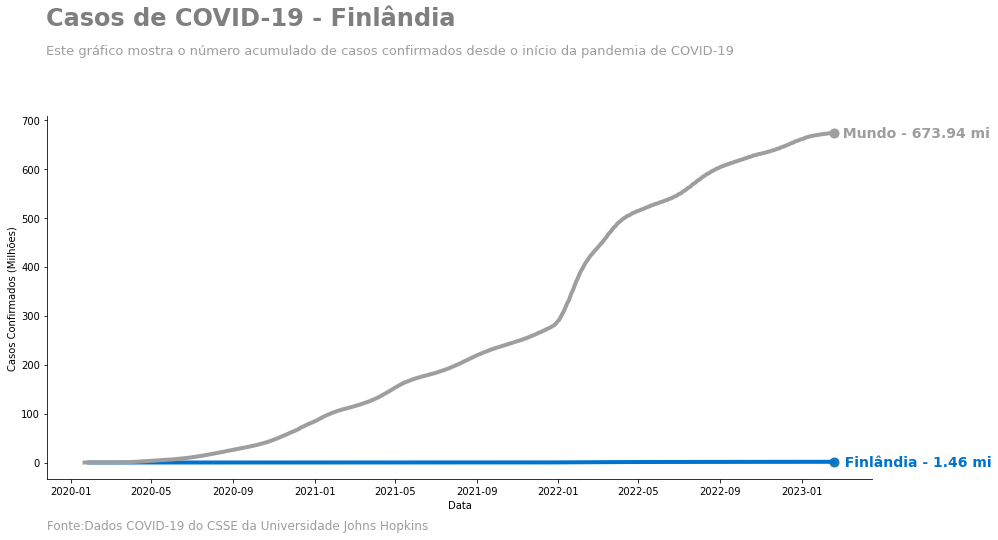

In [ ]:
#@title
#configurando as fontes
plt.rcParams['font.family'] = 'Arial'

# configurando as cores 
blue = '#0073CF'
gray = '#7F7F7F'
gray_text = "#9E9E9E"
# separando os dados 
total_case = df_fl[['date', 'total_cases']].copy()
case_world = world[['date', 'total_cases']].copy()
case_world.date = pd.to_datetime(case_world.date,format='%Y-%m-%d')
# configurando o grafico
fig, ax = plt.subplots(figsize=(14,8),dpi=72)
point = total_case.tail(1)
point_world = case_world.tail(1)
sns.scatterplot(data=point, x='date', y='total_cases',palette=blue, s=120,  ax=ax)
sns.scatterplot(data=point_world, x='date', y='total_cases',color=gray_text, s=120,  ax=ax)
sns.lineplot(data=total_case, x='date', y='total_cases', color=blue, linewidth=4 ,ax=ax)
sns.lineplot(data=case_world, x='date', y='total_cases', color=gray_text, linewidth=4, ax=ax)
last_point = point['total_cases'].values[0]
text_number = np.divide(last_point,1000000).round(2)
last_date = point['date'].values[0]
ax.annotate(f"\n  Finl√¢ndia - {text_number} mi", xy=(last_date, last_point), xytext=(0.5, -5),
            textcoords='offset points', fontsize=14, fontweight='semibold', color=blue),
last_point_world = point_world['total_cases'].values[0]
text_number_world = np.divide(last_point_world,1000000).round(2)
last_date_world = point_world['date'].values[0]
ax.annotate(f"\n\n  Mundo - {text_number_world} mi", xy=(last_date_world, last_point_world), xytext=(-1, -5),
            textcoords='offset points', fontsize=14, fontweight='semibold', color=gray_text),
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_ylabel("Casos Confirmados (Milh√µes)")
ax.set_xlabel("Data")
ax.get_yaxis().get_major_formatter().set_scientific(False)
ax.text(x=-0.001, y=1.250, s='Casos de COVID-19 - Finl√¢ndia ', fontsize=24, color=gray, fontweight='bold', transform=ax.transAxes)
ax.text(-0-0.001, 1.170,'Este gr√°fico mostra o n√∫mero acumulado de casos confirmados desde o in√≠cio da pandemia de COVID-19', fontsize=13, color=gray_text, transform=ax.transAxes)
ax.set_yticklabels([-1, 0, 100, 200, 300, 400, 500, 600, 700])
#rodap√©
ax.text(x=-0, y=-0.14, s='Fonte:Dados COVID-19 do CSSE da Universidade Johns Hopkins', fontsize=12, color=gray_text, transform=ax.transAxes)


plt.tight_layout()

#### `07/03/2020` - **primeira morte por coronav√≠rus na Finlandia.**



Em 20 de mar√ßo de 2020, a primeira morte relacionada ao coronav√≠rus foi confirmada na Finl√¢ndia. De acordo com o Instituto Nacional de Sa√∫de e Bem-Estar (THL), a pessoa que morreu era muito idosa e vivia na √°rea do distrito hospitalar de Helsinque e Uusimaa.A fim de proteger a privacidade, nenhuma informa√ß√£o adicional √© fornecida sobre a morte. A THL afirmou que, embora a doen√ßa seja geralmente leve para a maioria das pessoas, pode ser grave para os idosos, especialmente aqueles com doen√ßas subjacentes.

* **O Presidente da Rep√∫blica, Sauli Niinist√∂ , expressa suas condol√™ncias pela morte causada pelo coronavirus**



In [ ]:
#@title
%%html
<html lang="en">
<body>
<div class="testimonial-container">
  <div class="testimonial">
    <p class="testimonial-text">- Recebi informa√ß√µes confirmadas de que o coronav√≠rus fez sua primeira v√≠tima na Finl√¢ndia. Participo do luto dos parentes e entes queridos do falecido. Ao mesmo tempo, esta √© uma indica√ß√£o de que a epidemia de corona na Finl√¢ndia est√° passando para o pr√≥ximo est√°gio cada vez mais grave. Desejo for√ßa aos entes queridos do falecido.</p>
    <p class="testimonial-author">Sauli Niinist</p>
    <div class="testimonial-image-container">
      <img src="https://www.presidentti.fi/wp-content/uploads/2018/11/Sauli_Niinisto.jpg" class="testimonial-image">
    </div>
  </div>
</div>
</body>
<style>
.testimonial-container {
  width: 40%;
  margin:50px 0 0 0;;
  text-align: left;
}

.testimonial {
  background-color: white;
  padding: 40px;
  border-radius: 10px;
  box-shadow: 2px 2px 10px rgba(0, 0, 0, 0.1);
  display: flex;
  align-items: center;
  justify-content: center;
  flex-direction: column;
  
}

.testimonial-text {
  font-size: 18px;
  font-weight: bold;
  margin-bottom: 20px;
  color: #333;



}

.testimonial-author {
  color:#7F7F7F;
  font-size: 16px;

}

.testimonial-image-container {
  width: 75px;
  height: 75px;
  border-radius: 50%;
  border: 5px solid #0077be;
  padding: 0px;
  margin-top: 20px;
  display: flex;
  align-items: center;
  justify-content: center;


}

.testimonial-image {
  width: 70px;
  height: 70px;
  border: 3px solid #fff;
  border-radius: 50%;
  object-fit: cover;
}


}
</style>

<script>
window.onload = function() {
  const testimonialContainer = document.querySelector('.testimonial-container');
  testimonialContainer.style.opacity = 1;
};
</script>

* **Este √© um resumo da not√≠cia publicada no "Ilta-Sanomat", um dos maiores jornais di√°rios da Finl√¢ndia, publicado em Helsinki. Fundado em 1932, o jornal √© conhecido por sua cobertura abrangente de not√≠cias nacionais e internacionais, esportes, entretenimento, tecnologia e outros assuntos de interesse para seus leitores. Voc√™ pode ler a not√≠cia completa atrav√©s deste [link](https://www.is.fi/kotimaa/art-2000006448047.html).**

A Finl√¢ndia relatou sua primeira morte por COVID-19 no dia 21/03/2020, mas essa informa√ß√£o pode n√£o representar o n√∫mero real de √≥bitos ocorridos no pa√≠s. Quando verificamos as informa√ß√µes obtidas pelos dados do nosso dataset, **a primeira morte de fato ocorreu no dia 07/03/2020**. Isso nos deixa com algumas perguntas: **por que o governo finland√™s n√£o relatou essa morte? Ser√° que houve uma neglig√™ncia por parte do governo em relatar os n√∫meros de mortes precisos ao p√∫blico?**

In [ ]:
pd.DataFrame(df_clean[['iso_code','continent', 'location', 'date', 'total_deaths']].loc[39]).T

iso_code continent location       date total_deaths
39      FIN    Europe  Finland 2020-03-07          1.0

A falta de relato oficial sobre esse primeiro caso de morte pode ter sido causada por diversos fatores, incluindo processos essenciais, como a inspe√ß√£o post-mortem e testes laboratoriais para confirma√ß√£o da causa da morte.

A codifica√ß√£o manual das certid√µes de √≥bito tamb√©m pode causar atrasos significativos, especialmente em situa√ß√µes de grande aumento no n√∫mero de mortes, como foi o caso na Finl√¢ndia. No entanto, **como pode haver atraso em 6 registros de mortes, mas um √∫nico registro no dia 20/03/2020 foi relatado logo no dia seguinte?**

Apesar de todos esses questionamentos, √© importante lembrar que assim como os numeros de casos, os n√∫meros de mortes relatados em um dia espec√≠fico podem n√£o representar o n√∫mero real de √≥bitos ocorridos neste per√≠odo. Por exemplo, enquanto a Finlandia considerou a morte do dia 20/03/2020 como sua primeira morte relacionada ao COVID-19,  j√° se somavam um total de 7 mortes no dia.

In [ ]:
pd.DataFrame(df_fl[['iso_code','continent', 'location', 'date', 'total_deaths', 'new_deaths']].loc[52]).T

iso_code continent location       date total_deaths new_deaths
52      FIN    Europe  Finland 2020-03-20          7.0        1.0

* Para obter uma vis√£o mais precisa da situa√ß√£o, √© necess√°rio considerar o n√∫mero de mortes acumuladas ao longo do tempo, e n√£o apenas o n√∫mero de mortes relatadas em um √∫nico dia.

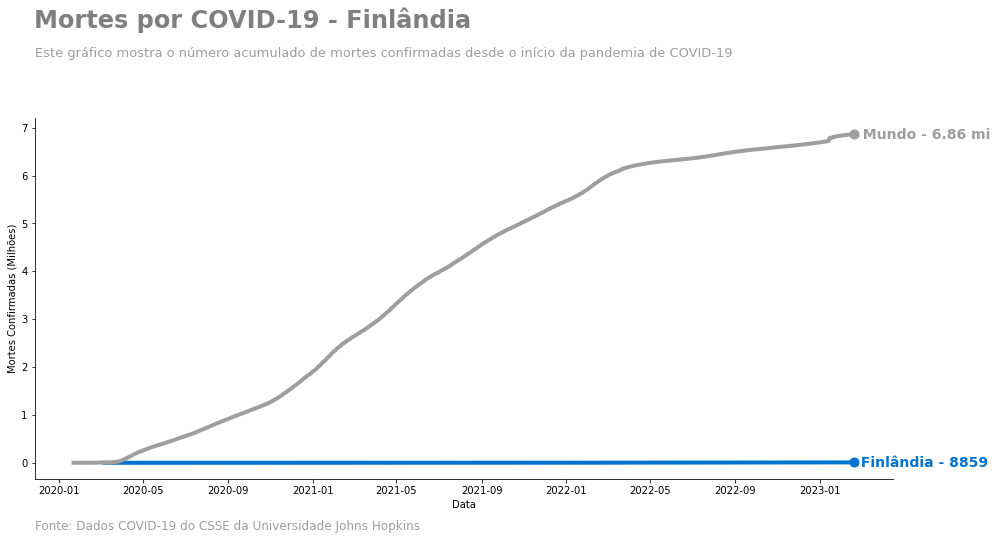

In [ ]:
#@title
total_death = df_fl[['date', 'total_deaths']].copy()
world_death = world[['date', 'total_deaths']].copy()
world_death.date = pd.to_datetime(world_death.date,format='%Y-%m-%d')
# configurando o grafico
fig, ax = plt.subplots(figsize=(14,8),dpi=72)
point = total_death.tail(1)
point_world = world_death.tail(1)
sns.scatterplot(data=point_world, x='date', y='total_deaths',color=gray_text, s=120,  ax=ax)
sns.scatterplot(data=point, x='date', y='total_deaths',color=blue, s=120,  ax=ax)
sns.lineplot(data=total_death, x='date', y='total_deaths', color=blue, linewidth=4 ,ax=ax)
sns.lineplot(data=world_death, x='date', y='total_deaths', color=gray_text, linewidth=4, ax=ax)
last_point = point['total_deaths'].values[0]
last_date = point['date'].values[0]
ax.annotate(f"\n \n Finl√¢ndia - {int(last_point)}", xy=(last_date, last_point), xytext=(2, -5),
            textcoords='offset points', fontsize=14, fontweight='semibold', color=blue)
last_point_world = point_world['total_deaths'].values[0]
last_date_world = point_world['date'].values[0]
text_number_world = np.divide(last_point_world,1000000).round(2)
ax.annotate(f"\n\n  Mundo - {text_number_world} mi", xy=(last_date_world, last_point_world), xytext=(-1, -5),
            textcoords='offset points', fontsize=14, fontweight='semibold', color=gray_text)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_ylabel("Mortes Confirmadas (Milh√µes)")
ax.set_xlabel("Data")
ax.get_yaxis().get_major_formatter().set_scientific(False)
ax.text(x=-0.001, y=1.250, s='Mortes por COVID-19 - Finl√¢ndia ', fontsize=24, color=gray, fontweight='bold', transform=ax.transAxes)
ax.text(-0, 1.170,'Este gr√°fico mostra o n√∫mero acumulado de mortes confirmadas desde o in√≠cio da pandemia de COVID-19', fontsize=13, color=gray_text, transform=ax.transAxes)
#rodap√©
ax.text(x=-0, y=-0.14, s='Fonte: Dados COVID-19 do CSSE da Universidade Johns Hopkins', fontsize=12, color=gray_text, transform=ax.transAxes)
ax.set_yticklabels([-1, 0, 1, 2, 3, 4, 5, 6, 7])



plt.tight_layout()

#### **Quanto tempo at√© a primeira morte ap√≥s o primeiro caso de COVID-19?**

*  Uma das informa√ß√µes importantes para entender a evolu√ß√£o da doen√ßa √© o tempo decorrido entre o primeiro caso e a primeira morte registrada. Isso pode ajudar a avaliar a rapidez da dissemina√ß√£o do v√≠rus.

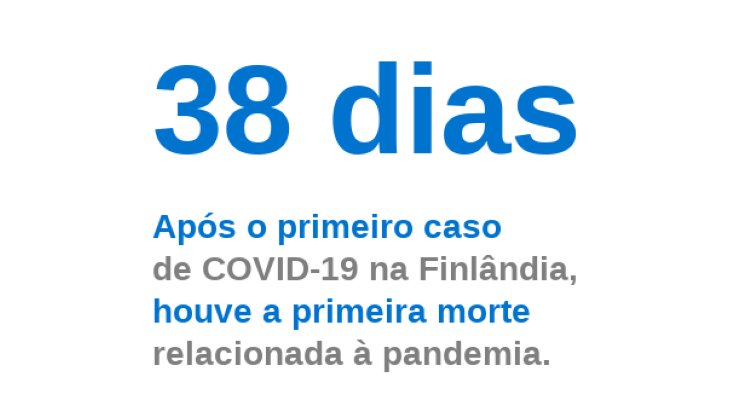

In [ ]:
#@title
days = str(total_death[total_death.notnull().all(axis=1)].date.loc[39] - total_case[total_case.notnull().all(axis=1)].date.loc[1])[:2]
img = Image.new("RGB", (600, 325), (255, 255, 255))
draw = ImageDraw.Draw(img)
font = ImageFont.truetype('/usr/share/fonts/truetype/liberation/LiberationSans-Bold.ttf', 105)
font_second = ImageFont.truetype('/usr/share/fonts/truetype/liberation/LiberationSans-Bold.ttf', 28)

text_width, text_height = draw.textsize(f"{int(days)} dias", font=font)
text_x = (img.width - text_width) / 2
text_y = (img.height - text_height) / 2
draw.text((120, 25), f"{int(days)} dias", fill=(0, 115, 207), font=font)

text_width, text_height = draw.textsize("ap√≥s o primeiro caso", font=font_second)
text_x = (img.width - text_width) / 2
text_y = (img.height + text_height) / 2
draw.text((120, 105), "\n\nAp√≥s o primeiro caso", fill=(0, 115, 207), font=font_second)
draw.text((120, 170), "\nde COVID-19 na Finl√¢ndia,", fill=(127, 127, 127), font=font_second)
draw.text((120, 175), "\n\nhouve a primeira morte", fill=(0, 115, 207), font=font_second)
draw.text((120, 240), "\nrelacionada √† pandemia.", fill=(127, 127, 127), font=font_second)


fig, ax = plt.subplots(figsize=(13,8), dpi=72)
ax.set_axis_off()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.imshow(img)
plt.show()


###  **4.Como a Finl√¢ndia se compara as demais na√ß√µes n√≥rdicas‚ùî** 


A Finl√¢ndia apresenta uma taxa de mortalidade bruta relativamente baixa em compara√ß√£o com a m√©dia global, cerca de 0,61%, o que sugere que o pa√≠s lidou bem com a pandemia. No entanto, √© importante avaliar o desempenho da Finl√¢ndia em rela√ß√£o a outros pa√≠ses n√≥rdicos, como Dinamarca, Isl√¢ndia, Noruega e Su√©cia, que compartilham v√°rias caracter√≠sticas em comum. Esses pa√≠ses t√™m sistemas de bem-estar social desenvolvidos, baixos n√≠veis de desigualdade, clima frio, alta qualidade de vida, economias mistas, lideran√ßa em pol√≠ticas ambientais e heran√ßa cultural e hist√≥rica semelhante.

* Nesse sentido, √© necess√°rio examinar como a Finl√¢ndia se destaca em rela√ß√£o a esses pa√≠ses no que se refere √† pandemia



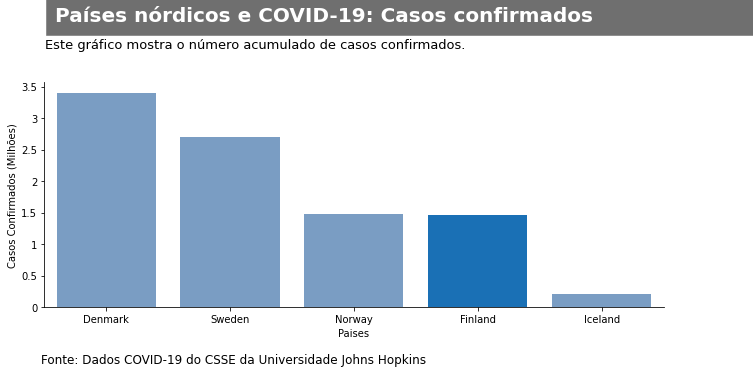

In [ ]:
#@title
gray_bar = '#333333'
cases_nordic = df_nordic.pivot_table('total_cases', 'location', 'date').T.tail(1).copy()
cases_nordic = pd.DataFrame({key: value for key, value  in zip(['location', 'cases'],[cases_nordic.columns.values, cases_nordic.values[:][0]])})
my_palette = ["#6E9CCF", "#6E9CCF", "#6E9CCF", '#0073CF', '#6E9CCF']
nordic = df_nordic.tail(1)
fig, ax = plt.subplots(figsize=(10.8, 6), dpi=72)
sns.barplot(data=cases_nordic.sort_values(by='cases', ascending=False), y='cases', x='location', palette=my_palette)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.get_yaxis().get_major_formatter().set_scientific(False)
ax.set_yticklabels([0, 0.5, 1, 1.5, 2, 2.5, 3,3.5])
ax.set_ylabel("Casos Confirmados (Milh√µes)")
ax.set_xlabel("Paises")
ax.text(0.017, 1.250, 'Pa√≠ses n√≥rdicos e COVID-19: Casos confirmados                      ', 
        fontsize=20, fontweight='semibold',va='bottom', color='white', 
        bbox=dict(facecolor=gray_bar, alpha=0.7, linewidth=1, edgecolor='gray', pad=9), transform=ax.transAxes)
ax.text(0.001, 1.150,'Este gr√°fico mostra o n√∫mero acumulado de casos confirmados.', fontsize=13, color='black', transform=ax.transAxes)
ax.text(x=-0.0045, y=-0.25, s='Fonte: Dados COVID-19 do CSSE da Universidade Johns Hopkins', fontsize=12, color='black', transform=ax.transAxes)
plt.tight_layout()

Quando comparamos o numero de casos nos paises nordicos, podemos tirar alguns insights valiosos:

* A Dinamarca tem o maior n√∫mero absoluto de casos confirmados de COVID-19 entre os pa√≠ses n√≥rdicos, com um total de 3.402.001, seguida pela Su√©cia com 2.697.159.

* A Noruega, por outro lado, apresenta o terceiro menor n√∫mero de casos confirmados.

* **A Finl√¢ndia tem um n√∫mero relativamente baixo de casos confirmados de COVID-19 em compara√ß√£o com outros pa√≠ses da regi√£o, seguindo como penultimo colocado em termos de casos confirmados.** 


* A Isl√¢ndia √© o pa√≠s n√≥rdico com o menor n√∫mero de casos confirmados de COVID-19 em termos absolutos, mas √© importante lembrar que a Isl√¢ndia tem uma popula√ß√£o significativamente menor em compara√ß√£o com outros pa√≠ses n√≥rdicos.

* Por fim, Podemos afirmar que **h√° aproximadamente 9.248.200 casos confirmados de COVID-19 em pa√≠ses n√≥rdicos**. **A Finl√¢ndia contribui com cerca de 15,8% desse total, com 1.461.583 casos confirmados.**
 

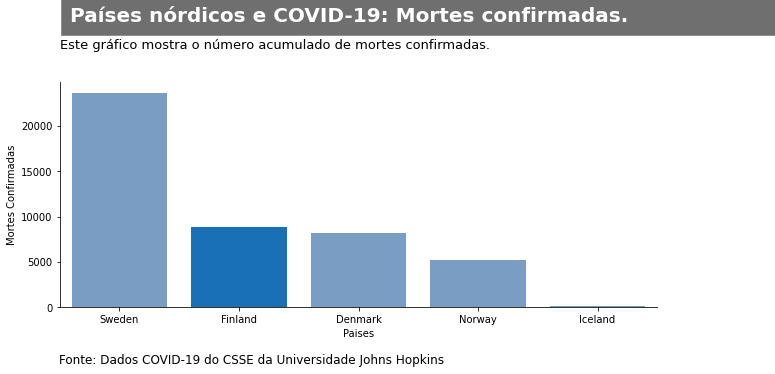

In [ ]:
#@title
deaths_nordic = df_nordic.pivot_table('total_deaths', 'location', 'date').T.tail(1).copy()
deaths_nordic = pd.DataFrame({key: value for key, value  in zip(['location', 'deaths'],[deaths_nordic.columns.values, deaths_nordic.values[:][0]])})
my_palette = ["#6E9CCF", '#0073CF', "#6E9CCF", "#6E9CCF", '#6E9CCF']
fig, ax = plt.subplots(figsize=(10.8, 6), dpi=72)
sns.barplot(data=deaths_nordic.sort_values(by='deaths', ascending=False), y='deaths', x='location', palette=my_palette)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_ylabel("Mortes Confirmadas")
ax.set_xlabel("Paises")
ax.text(0.017, 1.250, 'Pa√≠ses n√≥rdicos e COVID-19: Mortes confirmadas.                    ' ,
        fontsize=20, fontweight='semibold',va='bottom', color='white', 
        bbox=dict(facecolor=gray_bar, alpha=0.7, linewidth=1, edgecolor='gray', pad=9), transform=ax.transAxes)
ax.text(-0, 1.150,'Este gr√°fico mostra o n√∫mero acumulado de mortes confirmadas.', fontsize=13, color='black', transform=ax.transAxes)
ax.text(x=-0.001, y=-0.25, s='Fonte: Dados COVID-19 do CSSE da Universidade Johns Hopkins', fontsize=12, color='black', transform=ax.transAxes)
plt.tight_layout()

* Apesar de a Su√©cia liderar em n√∫mero absoluto de mortes confirmadas por COVID-19 entre os pa√≠ses n√≥rdicos, com um total de 23.634, √© importante notar que a popula√ß√£o sueca √© consideravelmente maior que a de outros pa√≠ses da regi√£o.

* **A Finl√¢ndia √© o segundo pa√≠s em n√∫mero de mortes confirmadas, com 8.859, o que corresponde a 19,2% do total de mortes na regi√£o (46.107), apesar de representar apenas 15,8% do total de casos confirmados.**

* A Noruega tem o segundo menor n√∫mero de mortes confirmadas, com um total de 5.175, seguida pela Dinamarca, que ocupa a terceira posi√ß√£o, com 8.228 mortes confirmadas.

* A Isl√¢ndia continua sendo o pa√≠s com o menor n√∫mero de casos e mortes confirmadas em compara√ß√£o com os outros pa√≠ses n√≥rdicos.




A taxa de mortalidade bruta √© uma medida que expressa a propor√ß√£o de mortes em rela√ß√£o ao total de casos de uma determinada doen√ßa. No caso da COVID-19, a taxa de mortalidade bruta √© calculada pela divis√£o do n√∫mero de mortes confirmadas acumuladas pelo n√∫mero de casos confirmados acumulados da doen√ßa, multiplicado por 100 para expressar o resultado em porcentagem.  essa √© uma m√©trica importante para avaliar o qu√£o letal √© uma doen√ßa em rela√ß√£o ao seu potencial de infec√ß√£o.

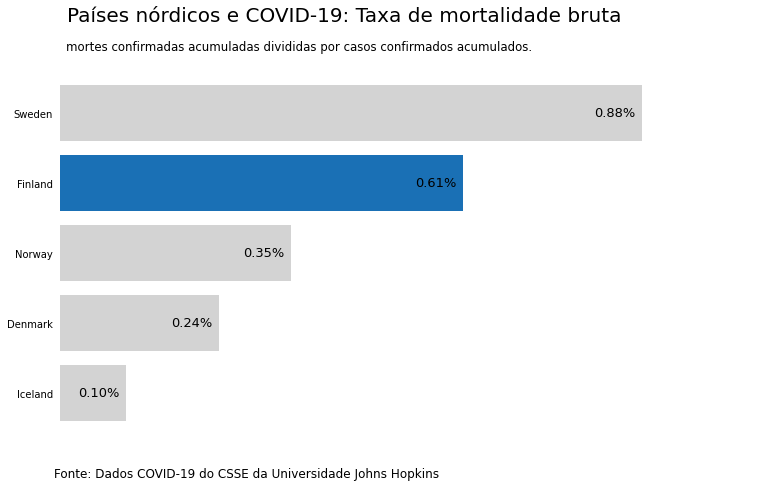

In [ ]:
#@title
mortality_rate = (np.divide(deaths_nordic['deaths'].values, cases_nordic['cases'].values)*100).round(2)
nordics = cases_nordic['location'].values
gray_light = "#D3D3D3"
df_mortality = pd.DataFrame({key:value for key, value in zip(['countries', 'mortality_rate'], [nordics, mortality_rate])})
fig, ax = plt.subplots(figsize=(10.8, 7), dpi=72)
bar_plot = sns.barplot(data=df_mortality.sort_values(by='mortality_rate', ascending=False), y='countries', x='mortality_rate', palette=[gray_light, blue, gray_light, gray_light, gray_light])
ax.tick_params(axis='y', which='both', left=False)
ax.set_xticks([])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_ylabel("")
ax.set_xlabel("")
for value, (index, row) in enumerate(df_mortality.sort_values(by='mortality_rate', ascending=False).iterrows()):
    x = row['mortality_rate']
    y = value
    width = bar_plot.containers[0][value].get_width()
    ax.text(x + -0.1 / 10, y + -0, '{:.2f}%'.format(x), ha='right', va='center', color='black',fontweight='ultralight', size=13)
ax.text(0.01, -1.250, 'Pa√≠ses n√≥rdicos e COVID-19: Taxa de mortalidade bruta                     ' ,
        fontsize=20, fontweight='medium',va='bottom', color='black')
ax.text(0.01, 1.08,'mortes confirmadas acumuladas divididas por casos confirmados acumulados.', fontsize=11.8, color='black', transform=ax.transAxes)
ax.text(x=-0.01, y=-0.14, s='Fonte: Dados COVID-19 do CSSE da Universidade Johns Hopkins', fontsize=12, color='bLACK', transform=ax.transAxes)
ax.tick_params(axis='y', which='both', left=False)
plt.tight_layout()


* A Su√©cia teve uma taxa de mortalidade (0,88) por COVID mais alta do que as na√ß√µes n√≥rdicas vizinhas. Um artigo foi publicado pela ABC News, uma organiza√ß√£o de not√≠cias americana, em 24 de mar√ßo de 2022, discute uma avalia√ß√£o contundente da resposta da Su√©cia √† pandemia de COVID-19. A avalia√ß√£o, encomendada pelo governo sueco, identificou uma s√©rie de falhas na abordagem da Su√©cia para controlar a propaga√ß√£o do v√≠rus. Segundo o relat√≥rio, a decis√£o da Su√©cia de confiar em medidas volunt√°rias, em vez de implementar bloqueios r√≠gidos e outras restri√ß√µes, levou a taxas mais altas de infec√ß√£o e morte em compara√ß√£o com os pa√≠ses vizinhos. O relat√≥rio tamb√©m destacou a falta de coordena√ß√£o entre as ag√™ncias governamentais, bem como medidas inadequadas para proteger idosos e popula√ß√µes vulner√°veis.Os resultados da avalia√ß√£o foram controversos, com alguns defendendo a abordagem da Su√©cia como um modelo para equilibrar a sa√∫de p√∫blica e as preocupa√ß√µes econ√¥micas. No entanto, outros argumentam que o alto n√∫mero de mortos no pa√≠s, principalmente entre os idosos, sugere que uma resposta mais agressiva era necess√°ria.Vale a pena notar que a avalia√ß√£o foi conduzida por uma comiss√£o independente, e o governo sueco reconheceu suas descobertas e prometeu fazer melhorias em sua resposta √† pandemia no futuro. Voc√™ pode ler o artigo completo atrav√©s deste [link](https://abcnews.go.com/Health/scathing-evaluation-swedens-covid-response-reveals-failures-control/story?id=83644832)

* **A Finl√¢ndia tem a segunda maior taxa de mortalidade entre os pa√≠ses n√≥rdico(0,61)**. Em seguida, temos Noruega e Dinamarca entre as taxas de mortalidade relativamente mais baixas de (0,35 e 0,24).

* A Isl√¢ndia √© o pa√≠s com a menor taxa de mortalidade (0,10) entre os pa√≠ses n√≥rdicos, o que pode n√£o ser surpreendente considerando a abordagem adotada pela na√ß√£o insular para lidar com a pandemia de COVID-19. Em um artigo publicado pela NBC News em 15 de mar√ßo de 2021, a estrat√©gia da Isl√¢ndia para gerenciar a dissemina√ß√£o do v√≠rus √© discutida em detalhes. A na√ß√£o concentrou-se em um sistema rigoroso de teste, rastreamento, quarentena e isolamento para controlar a dissemina√ß√£o do v√≠rus. Al√©m disso, a Isl√¢ndia imp√¥s rigorosos controles de fronteira e quarentenas para viajantes, o que ajudou a evitar que o v√≠rus se espalhasse pelo pa√≠s. A NBC News √© uma organiza√ß√£o de not√≠cias americana que produz conte√∫do de interesse geral, incluindo cobertura de assuntos pol√≠ticos e econ√¥micos, entre outros. Voc√™ pode ler o artigo completo atrav√©s deste [link](https://www.nbcnews.com/news/world/how-iceland-kept-coronavirus-pandemic-under-control-n1260635)

## **Conclus√µes**

A Finl√¢ndia tem sido amplamente elogiada por sua resposta eficaz √† pandemia em compara√ß√£o com muitos outros pa√≠ses em todo o mundo. Desde o registro do primeiro caso de COVID-19, o pa√≠s j√° estava se preparando para poss√≠veis ocorr√™ncias. Um dos fatores que pode ter contribu√≠do para esse sucesso √© a forte infraestrutura e um sistema de cuidados de sa√∫de abrangente e acess√≠vel, que ajudou a garantir que os pacientes com COVID-19 recebessem os cuidados necess√°rios.

Quando compararamos com outros paises n√≥rdicos, os aspecto n√£o √© t√£o positivo, a Finl√¢ndia √© o segundo pa√≠s da regi√£o com o maior n√∫mero de mortes e a maior taxa de mortalidade por COVID-19. √â importante destacar, no entanto, que esses n√∫meros podem ser influenciados por diversos fatores, como a densidade populacional e a idade m√©dia da popula√ß√£o e entre outros.

Em suma, os  pa√≠ses n√≥rdicos tiveram desempenho superior durante a pandemia de COVID-19 em rela√ß√£o a outros pa√≠ses de alta renda, tanto em termos de sa√∫de p√∫blica quanto econ√¥micos. As taxas de infec√ß√£o e mortalidade foram relativamente baixas na regi√£o, com exce√ß√£o da Su√©cia, que se baseou mais em recomenda√ß√µes do que em medidas obrigat√≥rias para conter o v√≠rus.